In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import os
import json
from collections import defaultdict

from scipy.stats import spearmanr, pearsonr

from regmixer.synthesize_mixture import calculate_priors
from regmixer.utils import config_from_path
from regmixer.eval.utils import (
    build_regression,
    get_output_dir,
    get_runs_from_api,
    mk_run_from_json,
    mk_run_metrics,
    mk_weights_from_config,
    mk_output_prefix,
    plot_correlation,
    simulate2,
    )


import pathlib
import wandb


from regmixer.eval.constants import GroupedWandbMetrics


from regmixer.eval.law import ScalingLaw

# Load data

In [3]:
config = "src/regmixer/config/dclm-datadelve-5xC-30m-dolma2tok.yaml"
launch_config = config_from_path(config)


priors = calculate_priors(
        source_configs=launch_config.sources,
        dtype=launch_config.dtype,
        use_cache=False,
    )

Counting source tokens:   0%|          | 0/24 [00:00<?, ?it/s]2025-04-07 18:05:53,222 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Connection pool size: 10
2025-04-07 18:05:53,239 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Connection pool size: 10
2025-04-07 18:05:53,252 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Connection pool size: 10
2025-04-07 18:05:53,257 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Connection pool size: 10
2025-04-07 18:05:53,263 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Connection pool size: 10
2025-04-07 18:05:53,360 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: ai2-llm.s3.amazonaws.com. Con

In [ ]:
BASE_CACHE_DIR = "cache/"

experiment_groups = ["206f164f"]


cache_path = pathlib.Path(BASE_CACHE_DIR) / f"{'_'.join(experiment_groups)}_runs_cache.json"
api = wandb.Api() 

workspace = "ai2-llm/regmixer"

num_samples=1

group_metrics= 'all_bpb' #'arc_easy_new' #'mmlu_bpb_new' #'val_loss' #'mmlu_bpb_new'
eval_metric_group = GroupedWandbMetrics[group_metrics]
eval_metric_group_name = group_metrics

run_instances = get_runs_from_api(
        api, workspace, experiment_groups, cache_path, False, num_samples, eval_metric_group
    )
    
run_ratios = [
        {"run": run.id, "index": idx, **mk_weights_from_config(run.config, priors)}
        for idx, run in enumerate(run_instances)
    ]

2025-04-07 18:17:36,680 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0009:hsbm57e5 with samples: (1, 21)
2025-04-07 18:17:36,685 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0003:k9k2j1ia with samples: (1, 21)
2025-04-07 18:17:36,687 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0006:lbimptkr with samples: (1, 21)
2025-04-07 18:17:36,689 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0008:j7tpz28p with samples: (1, 21)
2025-04-07 18:17:36,691 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0001:qevd2gzk with samples: (1, 21)
2025-04-07 18:17:36,693 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0007:92o2jfpg with samples: (1, 21)
2025-04-07 18:17:36,696 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-20

finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


2025-04-07 18:17:36,877 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0079:fqxzt04i with samples: (1, 21)
2025-04-07 18:17:36,879 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0078:wfmqgsnt with samples: (1, 21)
2025-04-07 18:17:36,880 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0075:yk9yymf8 with samples: (1, 21)
2025-04-07 18:17:36,882 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0077:t8ek9z2z with samples: (1, 21)
2025-04-07 18:17:36,884 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0080:ghx97832 with samples: (1, 21)
2025-04-07 18:17:36,885 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-206f164f-0082:qxq9p3sc with samples: (1, 21)
2025-04-07 18:17:36,887 - regmixer.eval.utils - INFO - Collected RunInstance for dclm-datadelve-1xC-30m-20

finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


In [6]:
run_metrics = []
for idx, run in enumerate(run_instances):
    if len(run.samples) == 0:
        continue 
    entry =    {
        "run": run.id,
        "index": idx,
        **mk_run_metrics(
            history=run.samples,
            samples=num_samples,
            metrics=(eval_metric_group_name, eval_metric_group.value),
            average=False,
        ),
    }
    run_metrics.append(entry)


In [7]:
ratios = pd.DataFrame(run_ratios)
metrics = pd.DataFrame(run_metrics)
ratios = ratios[ratios['run'].isin(metrics.run)]

In [8]:
X = ratios[ratios.columns[2:]].values
Y = metrics[metrics.columns[2:]].values

In [16]:
np.argsort(Y.mean(axis=1))

array([ 91,  47, 117,   8,  75,  14,   9,  65,  49,  44,  46,  74,  41,
        12,  63,  79,   1,  60,  96,  21,  40,  66,  50, 116,  22,   2,
        95,  53,  97,  51, 113, 101,  59, 118,  76,  87,  73, 112,  36,
        43,  34,   6,  30,  88,  83,  17,  56,  84, 104, 106,  54,  81,
       100,  39, 110,  64, 115,  52,  32, 102,  78,  89,  86,  77,  45,
        10,  61,  58,  80,  85,  71,  33,   5,  42,  67,  28,  20,  70,
        62,  93,  82,  11,  92,  15,  55,  68,  48,  24, 114, 103,  31,
        23,  26,  94,  16,  69,  99,  98, 108,   4,  19,  25,  18,   3,
         0,   7, 111,  27,  29,  35,  72, 107, 109,  57,  90,  13,  37,
        38, 105])

In [18]:
Y.shape

(119, 21)

In [12]:
Y.mean(axis=1)[91]

1.7814615567525227

In [20]:
ratios.iloc[91]

run                            c7vnd43j
index                                91
adult_content                       0.0
art_and_design                      0.0
crime_and_law                       0.0
education_and_jobs                  0.0
electronics_and_hardware            0.0
entertainment                       0.0
fashion_and_beauty                  0.0
finance_and_business                0.0
food_and_dining                     0.0
games                          0.052632
health                         0.105263
history_and_geography               0.0
home_and_hobbies                    0.0
industrial                          0.0
literature                          0.0
politics                       0.052632
religion                            0.0
science_math_and_technology    0.684211
social_life                         0.0
software                            0.0
software_development           0.105263
sports_and_fitness                  0.0
transportation                      0.0


In [51]:
X

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.65],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.05, 0.1 , 0.3 , ..., 0.  , 0.  , 0.15],
       [0.  , 0.95, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.6 , ..., 0.  , 0.  , 0.  ]])

In [57]:
ratios.iloc[47]

run                            qmtl3jgn
index                                47
politics                            0.0
science_math_and_technology         0.9
games                               0.0
industrial                          0.0
art_and_design                      0.0
entertainment                       0.0
software                            0.0
education_and_jobs                  0.1
religion                            0.0
literature                          0.0
social_life                         0.0
adult_content                       0.0
food_and_dining                     0.0
crime_and_law                       0.0
software_development                0.0
fashion_and_beauty                  0.0
transportation                      0.0
electronics_and_hardware            0.0
travel_and_tourism                  0.0
home_and_hobbies                    0.0
finance_and_business                0.0
sports_and_fitness                  0.0
history_and_geography               0.0


In [55]:
Y.argmin()

47

# Inspect swarm mixtures

In [30]:
X.shape

(119, 24)

In [32]:
n_domains = X.shape[-1]

In [34]:
from collections import defaultdict
density = []

support_count = defaultdict(int)

for row in X:
    density.append(len(np.where(row != 0)[0]) / len(row))

    support_count[tuple(np.where(row != 0)[0])] += 1

density = np.array(density)
print(density.mean(), density.min(), density.max())


support_size = density * n_domains 
print(support_size.mean(), support_size.min(), support_size.max())

0.13935574229691872 0.041666666666666664 0.3333333333333333
3.3445378151260505 1.0 8.0


In [31]:
support_count

defaultdict(int,
            {(19, 23): 2,
             (4, 5, 13, 14): 1,
             (13, 14): 1,
             (21,): 1,
             (0, 9, 18, 19, 22): 1,
             (16, 23): 2,
             (0, 5, 14, 18): 1,
             (8, 23): 1,
             (1, 3, 14): 1,
             (1, 5, 20): 1,
             (2, 5, 7, 8, 10, 12, 20): 1,
             (2, 10, 13): 1,
             (1, 5, 6, 13, 21): 1,
             (0, 22): 1,
             (1, 5, 6, 8, 9): 1,
             (2, 8): 1,
             (5, 23): 2,
             (0, 6, 9): 1,
             (10, 23): 1,
             (19, 22): 1,
             (4, 5, 23): 1,
             (2, 14): 1,
             (0, 1, 2, 8, 21, 23): 1,
             (5, 10, 15, 21, 23): 1,
             (10, 21): 1,
             (9, 23): 1,
             (5, 9, 12): 1,
             (0, 2, 23): 1,
             (18, 22): 1,
             (6, 8, 10, 21, 23): 1,
             (2, 8, 11): 1,
             (0, 6, 7, 9): 1,
             (0, 2, 14): 1,
             (0, 19): 1,
 

In [67]:
for i, row in enumerate(X):
    support = tuple(np.where(row != 0)[0])
    if support_count[support] > 1:
        print(i, support, row[list(support)])


0 (12, 22) [0.35 0.65]
5 (2, 22) [0.85 0.15]
16 (18, 22) [0.5 0.5]
23 (18, 22) [0.2 0.8]
33 (2, 22) [0.3 0.7]
69 (12, 22) [0.25 0.75]


In [48]:
ratios.columns[2:][[12, 22]]

Index(['home_and_hobbies', 'health'], dtype='object')

In [42]:
ratios.iloc[[16, 23]]

,run,index,education_and_jobs,literature,transportation,software_development,industrial,software,social_life,religion,...,crime_and_law,finance_and_business,food_and_dining,fashion_and_beauty,entertainment,science_math_and_technology,sports_and_fitness,games,health,history_and_geography
16,1cy0qtmy,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0
23,swuv373r,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.8,0.0


In [37]:
ratios.iloc[[5, 33]]

,run,index,education_and_jobs,literature,transportation,software_development,industrial,software,social_life,religion,...,crime_and_law,finance_and_business,food_and_dining,fashion_and_beauty,entertainment,science_math_and_technology,sports_and_fitness,games,health,history_and_geography
5,iyr8a9nn,5,0.0,0.0,0.85,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
33,gkfm7f2n,33,0.0,0.0,0.30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,0.0


In [46]:
ratios.iloc[[0, 73]]

,run,index,education_and_jobs,literature,transportation,software_development,industrial,software,social_life,religion,...,crime_and_law,finance_and_business,food_and_dining,fashion_and_beauty,entertainment,science_math_and_technology,sports_and_fitness,games,health,history_and_geography
0,evt5quxd,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.0
73,7lxtrlhb,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0


# Fit things

Warning: this fitting law doesn't use $k_i$, because we effectively do the same when we have one weight per $p_i$, including the last $p_k = 1 - all others$

In [35]:
import torch
from regmixer.eval.law import ScalingLaw

def mixing_law(x, param):
    log_c_i = param[0]
    t_i = param[1:]
    result = torch.exp(log_c_i) + torch.exp(torch.matmul(x, t_i))
    return result

def init_params_law(idx, num_domains=3):
    for log_c_i in np.linspace(-2, 1.5, 10):
        for _ in range(30):
            ts = [-np.random.rand() if i == idx else np.random.rand() * 0.1 for i in range(num_domains)]
            yield [log_c_i] + ts


In [36]:
def calculate_r_squared(actuals, predictions):
    actuals, predictions = actuals.numpy(), predictions.numpy()
    # Calculate the total sum of squares
    total_sum_of_squares = np.sum((actuals - np.mean(actuals)) ** 2)
    # Calculate the residual sum of squares
    residual_sum_of_squares = np.sum((actuals - predictions) ** 2)
    # Calculate R-squared
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

In [37]:
domains = ratios.columns[2:].values

0


100%|██████████| 300/300 [01:01<00:00,  4.86it/s]

min loss: 0.0007039643242023885
optimal_param: tensor([ 1.5642, -1.4216, -2.3711, -0.8900, -0.6889, -0.3306, -0.3722, -0.9182,
        -1.1025, -3.4414, -1.1252, -2.0484, -1.2930, -0.6959, -0.3741, -1.0842,
        -0.5323, -0.7380, -1.2808, -2.9043, -1.9160, -1.4360, -1.6578, -0.5661,
        -5.0564])
RMSE: 0.06188784900868905, MAE: 0.043471582730611164, MSE: 0.003830105997622013, R2: 0.836210988608845
1



/tmp/ipykernel_197023/1261178280.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r2_train = calculate_r_squared(torch.tensor(y), torch.tensor(prediction_train))
100%|██████████| 300/300 [01:12<00:00,  4.14it/s]


min loss: 0.0010246839374303818
optimal_param: tensor([  1.5043,  -1.0635,  -0.3134,  -0.4623, -15.2431,  -1.0920,  -2.3448,
         -0.2853,  -0.2480,  -0.7472,  -0.1863,  -0.0935,  -0.2140,  -0.2699,
         -0.6755,  -0.4990,  -0.5934,  -0.2462,  -1.6557,  -0.5270,  -3.9248,
         -0.2539,  -0.9604,  -0.5981,  -0.2415])
RMSE: 0.08052802457894824, MAE: 0.05993136962254842, MSE: 0.00648476229980588, R2: 0.9025154743562009
2


100%|██████████| 300/300 [01:02<00:00,  4.83it/s]


min loss: 0.0006411795038729906
optimal_param: tensor([ 1.5168, -0.4481, -0.0797, -0.0081, -2.2395, -0.7413, -0.4603,  0.2235,
         0.0319, -0.0071,  0.2567, -0.2644,  0.1853,  0.1518, -0.2057,  0.1381,
        -0.3600,  0.1475, -0.4992,  0.1040, -6.9342,  0.1607, -0.1431, -0.1801,
         0.1250])
RMSE: 0.061287532895667185, MAE: 0.040242532889048256, MSE: 0.0037561615463346243, R2: 0.9715248915798351
3


100%|██████████| 300/300 [00:53<00:00,  5.56it/s]

min loss: 0.0005608091596513987
optimal_param: tensor([  1.5894,  -5.3223,  -4.7937,  -1.1136, -10.8889,  -1.3289,  -2.4818,
         -1.1950,  -1.9471,  -1.5508,  -1.3944,  -1.5279,  -1.7783,  -0.8798,
         -0.7140,  -1.4820,  -1.4234,  -0.8758,  -2.1798,  -2.1165,  -3.8897,
         -0.7181,  -1.5422,  -1.2336,  -1.9858])
RMSE: 0.05096866844172956, MAE: 0.03631346623102824, MSE: 0.0025978051126003265, R2: 0.8020863645434851
4



100%|██████████| 300/300 [01:10<00:00,  4.25it/s]


min loss: 0.0007148248259909451
optimal_param: tensor([ 1.4586, -1.8633, -2.1924, -0.9132, -0.4526, -0.7364, -0.3645, -0.8715,
        -1.1480, -2.5308, -0.5291, -2.3913, -1.5052, -0.7188, -0.2640, -1.3647,
        -0.7244, -0.9157, -1.9262, -2.5940, -1.6294, -2.3722, -1.0820, -0.6616,
        -6.0683])
RMSE: 0.061971848128173794, MAE: 0.044298215707143145, MSE: 0.0038405100349336863, R2: 0.8186140997232191
5


100%|██████████| 300/300 [01:26<00:00,  3.46it/s]

min loss: 0.0023757072631269693
optimal_param: tensor([ 1.3811,  0.8288,  1.2354,  1.1639, -9.1901,  1.1399, -0.1620,  1.2853,
         1.2451,  1.0497,  1.2886,  0.9314,  1.3543,  1.2511,  0.6879,  1.2730,
         1.1087,  1.2093,  0.8173,  1.1820,  0.4868,  1.2571,  0.5741,  1.2980,
         1.2850])
RMSE: 0.1860867998563412, MAE: 0.12790590922037762, MSE: 0.03462829440832138, R2: 0.9701370921147794
6



100%|██████████| 300/300 [00:49<00:00,  6.07it/s]


min loss: 0.00046582380309700966
optimal_param: tensor([ 1.3390, -0.2343, -0.0758,  0.0037, -0.1014,  0.3504, -0.1869, -0.2515,
        -0.0700, -0.1978, -0.0858, -0.1303, -0.0771, -0.0539, -0.0118,  0.0125,
         0.0094, -0.0136, -0.5130, -0.2176, -0.0096, -0.1210, -0.3300, -0.0404,
         0.1510])
RMSE: 0.044442177090345675, MAE: 0.03107771078745524, MSE: 0.001975107006728649, R2: 0.6840124768434298
7


100%|██████████| 300/300 [01:22<00:00,  3.62it/s]

min loss: 0.0009726153803057969
optimal_param: tensor([ 1.4310, -1.2032, -0.0688, -0.4829, -0.9027, -2.2385, -0.4839,  0.0355,
        -0.1136, -0.1782, -0.0468, -0.2837, -0.0310, -0.2045, -0.1181, -0.2888,
        -0.6467, -0.2153, -1.4225, -0.0614, -7.5285, -0.3456, -0.2799, -2.8294,
        -0.0706])
RMSE: 0.08354948651788976, MAE: 0.05720431804656982, MSE: 0.006980516482144594, R2: 0.9365988991052028
8



100%|██████████| 300/300 [00:51<00:00,  5.85it/s]


min loss: 0.0006654221215285361
optimal_param: tensor([ 1.3429, -0.2728,  0.0821, -0.0045,  0.1365, -0.0602, -0.0218,  0.0186,
         0.1285, -0.2598,  0.0169, -0.1473,  0.0771, -0.0255,  0.1569,  0.0303,
        -0.0047,  0.0497, -0.6489, -0.0544, -0.0312, -0.0167, -0.0182, -0.0016,
         0.1561])
RMSE: 0.057670653262681386, MAE: 0.04157350460688273, MSE: 0.003325904253870249, R2: 0.4496506373388506
9


100%|██████████| 300/300 [01:22<00:00,  3.62it/s]

min loss: 0.00048488471657037735
optimal_param: tensor([ 1.5419, -1.1558, -3.3067, -0.3295, -0.9201,  0.0319, -0.5155, -0.5539,
        -1.6049, -1.3685, -0.5002, -1.8675, -0.8108, -0.3045, -0.2176, -0.6950,
        -0.2969, -0.6188, -0.9525, -1.1139, -1.0138, -0.3547, -0.8561, -0.3881,
        -4.0801])
RMSE: 0.044118865229161905, MAE: 0.03226564327875773, MSE: 0.0019464741926640272, R2: 0.9288697202630575
10



100%|██████████| 300/300 [00:46<00:00,  6.43it/s]


min loss: 0.0007163091795518994
optimal_param: tensor([ 1.3266e+00, -3.0276e-01,  1.0088e-01,  2.9902e-03,  9.7313e-02,
        -2.4406e-02, -3.9109e-02,  4.9154e-02,  1.4223e-01, -2.7546e-01,
         1.4679e-01, -2.0316e-01,  9.7536e-02, -3.9903e-02,  1.5782e-01,
         3.9555e-02, -1.2673e-02,  1.2804e-02, -6.9635e-01, -3.1503e-02,
        -5.0570e-02, -1.1567e-02, -1.4045e-02,  8.8744e-04,  1.4178e-01])
RMSE: 0.06189876454796369, MAE: 0.0441336194674174, MSE: 0.00383145734667778, R2: 0.43411382809415877
0.006654281698336656 0.008977408495093665
0.7940304065973695 0.18475636392628006


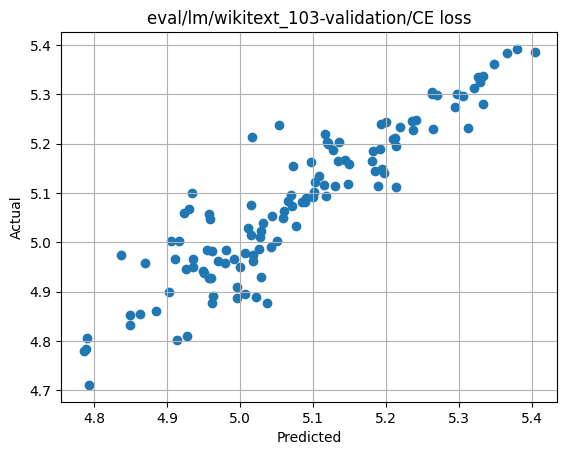

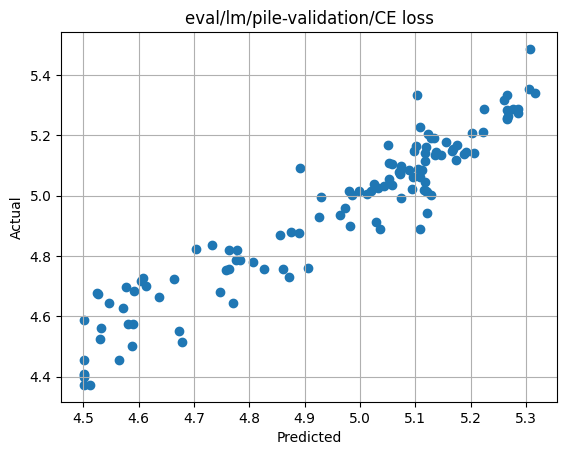

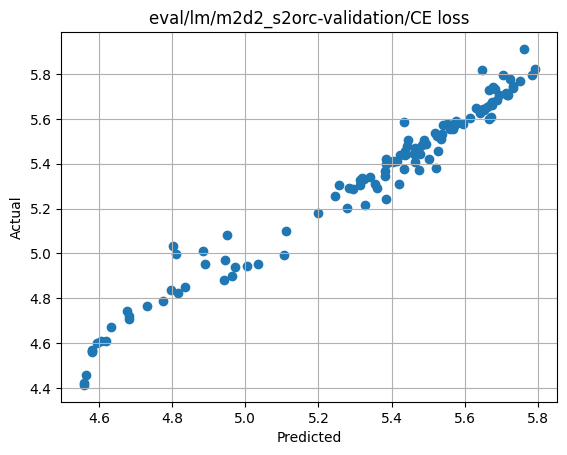

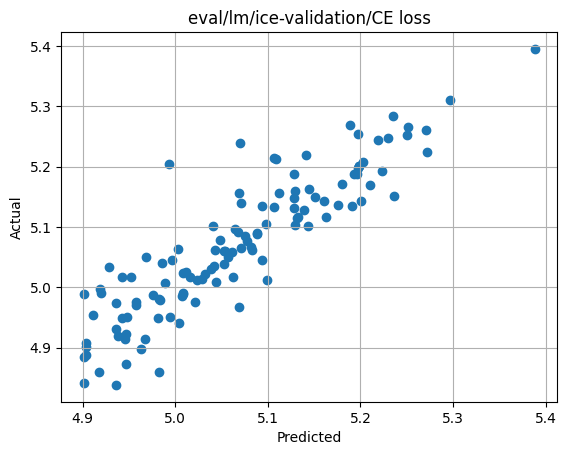

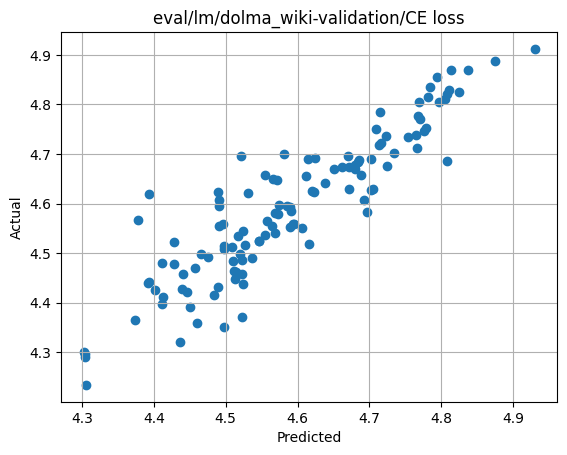

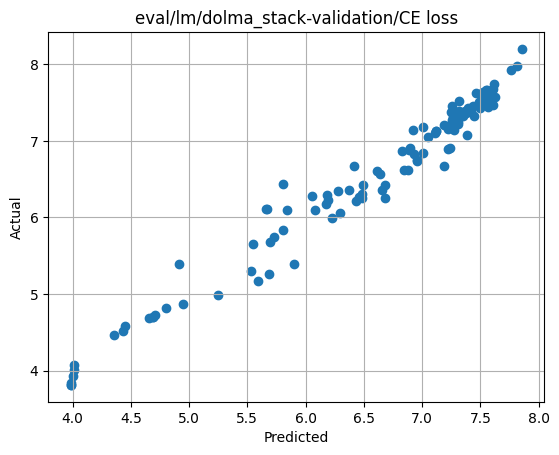

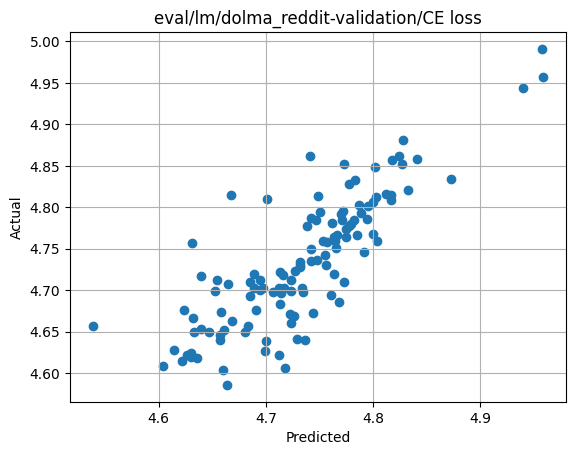

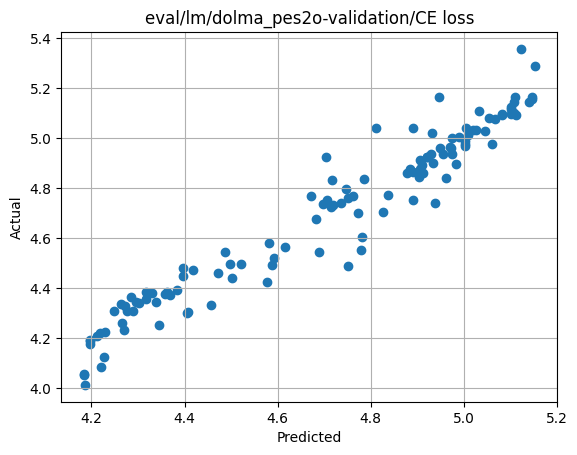

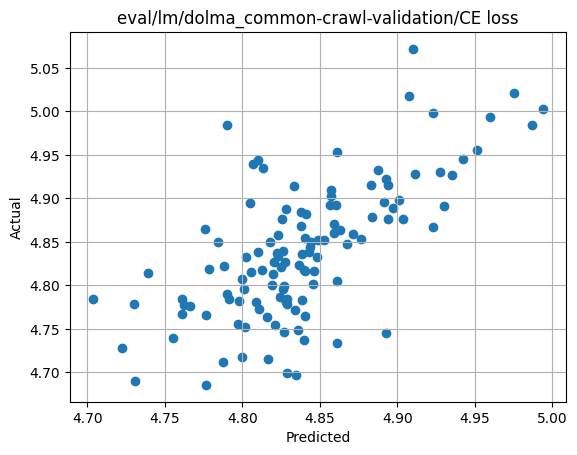

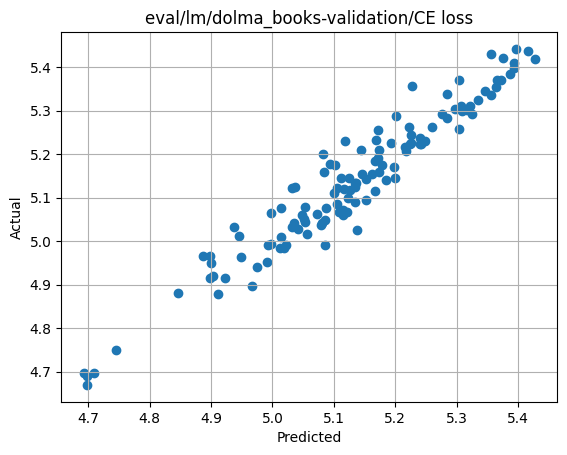

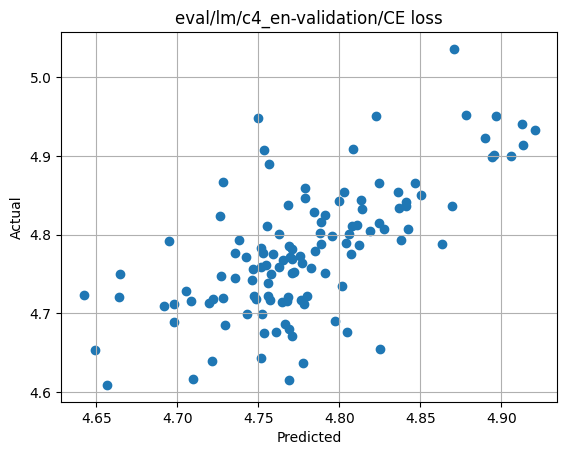

In [151]:
params = {}

mses = []
r2s = []

for i in range(Y.shape[-1]): # each task:
    y = Y[:, i]
        
    law = ScalingLaw(mixing_law)

    print(i)

    p = law.fit(X, y, init_params_law(i, num_domains=len(domains)), max_step=100, delta=0.02)
    params[i] = p

    prediction_train = mixing_law(torch.tensor(X, dtype=torch.float), torch.tensor(p, dtype=torch.float))
    rmse_train = (torch.mean((prediction_train - y)**2)**0.5).item()
    mae_train = torch.mean(torch.abs(prediction_train - y)).item()
    mse_train = torch.nn.functional.mse_loss(prediction_train, torch.tensor(y, dtype=torch.float)).item()
    r2_train = calculate_r_squared(torch.tensor(y), torch.tensor(prediction_train))

    mses.append(mse_train)
    r2s.append(r2_train)


    print(f"RMSE: {rmse_train}, MAE: {mae_train}, MSE: {mse_train}, R2: {r2_train}")

    plt.figure()
    plt.scatter(prediction_train, y)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.grid() 
    plt.title(eval_metric_group.value[i])

mses = np.array(mses)
r2s = np.array(r2s)

print(mses.mean(), mses.std())
print(r2s.mean(), r2s.std())

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

0


100%|██████████| 300/300 [00:24<00:00, 12.22it/s]
/tmp/ipykernel_222382/3476110816.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r2_train = calculate_r_squared(torch.tensor(y_train), torch.tensor(prediction_train))
/tmp/ipykernel_222382/3476110816.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r2_test = calculate_r_squared(torch.tensor(y_test), torch.tensor(prediction_test))
/tmp/ipykernel_222382/3476110816.py:75: RuntimeWarning: Mean of empty slice.
  print(mses.mean(), mses.std())
/home/mayee/miniconda3/envs/mayeeenv/lib/python3.13/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home

min loss: 0.0004914437886327505
R2: 0.905199134311839
nan nan
0.905199134311839 0.0


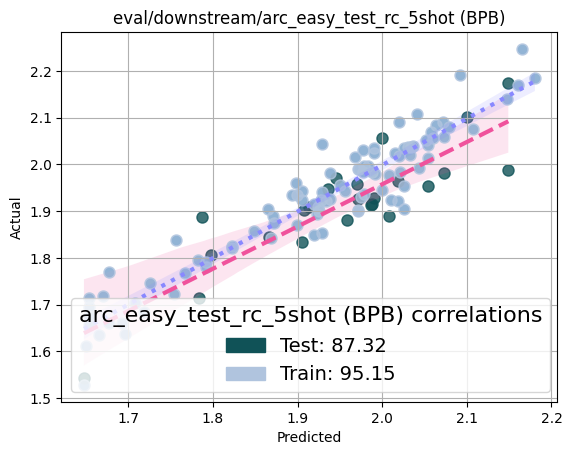

In [40]:
params = {}

mses = []
r2s = []

for i in range(Y.shape[-1]): # each task:
    y = Y[:, i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    law = ScalingLaw(mixing_law)

    print(i)

    p = law.fit(X_train, y_train, init_params_law(i, num_domains=len(domains)), max_step=100, delta=0.02)
    params[i] = p

    prediction_train = mixing_law(torch.tensor(X_train, dtype=torch.float), torch.tensor(p, dtype=torch.float))
    prediction_test = mixing_law(torch.tensor(X_test, dtype=torch.float), torch.tensor(p, dtype=torch.float))
    #rmse_train = (torch.mean((prediction_train - y_train)**2)**0.5).item()
    #mae_train = torch.mean(torch.abs(prediction_train - y)).item()
    #mse_train = torch.nn.functional.mse_loss(prediction_train, torch.tensor(y, dtype=torch.float)).item()
    r2_train = calculate_r_squared(torch.tensor(y_train), torch.tensor(prediction_train))
    r2_test = calculate_r_squared(torch.tensor(y_test), torch.tensor(prediction_test))

    r2s.append(r2_train)


    print(f"R2: {r2_train}")

    plt.figure()
    plt.scatter(prediction_train, y_train)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.grid() 
    plt.title(eval_metric_group.value[i])



    # Plot test
    sns.regplot(
        x=prediction_test.numpy(),
        y=y_test,
        scatter_kws={"s": 64, "color": "#105257"},
        line_kws={"color": "#F0529C", "linewidth": 3, "linestyle": "dashed"},
        label="Test"
    )

    # Plot train
    sns.regplot(
        x=prediction_train.numpy(),
        y=y_train,
        scatter_kws={"s": 64, "color": "#B0C4DE"},
        line_kws={"color": "#8888FF", "linewidth": 3, "linestyle": "dotted"},
        label="Train"
    )

    corr_test = np.corrcoef(prediction_test, y_test)[0, 1]
    corr_train = np.corrcoef(prediction_train, y_train)[0, 1]

    import matplotlib.patches as mpatches

    test_dot = mpatches.Patch(color="#105257", label=f"Test: {np.round(corr_test * 100, 2)}")
    train_dot = mpatches.Patch(color="#B0C4DE", label=f"Train: {np.round(corr_train * 100, 2)}")

    plt.legend(
        handles=[test_dot, train_dot],
        title=f"{eval_metric_group.value[i].split('/')[-1]} correlations",
        fontsize=14,
        title_fontsize=16,
    )


mses = np.array(mses)
r2s = np.array(r2s)

print(mses.mean(), mses.std())
print(r2s.mean(), r2s.std())